In [2]:
import matplotlib.pylab as pl
%matplotlib inline
import cPickle as pickle
import numpy as np

In [14]:
path = 'weight-normalization-checkpoints'
N_FILES = 50
parameters = [None for n in range(N_FILES)]

In [30]:
from thread import start_new_thread as start_thread
from threading import Event
import time

def load(index, parameters, counter):
    n = (index + 1) * 100
    label = '%s/parameters-iteration-%d' % (path, n)
    data = pickle.load(open(label, 'rb'))
    parameters[index] = data
    counter['counter'] -= 1

counter = {'counter' : N_FILES}
for iteration in range(N_FILES):
    start_thread(load, (iteration, parameters, counter))

while not counter['counter'] != 0:
    time.sleep(0.1)

In [25]:
gains = {key : [] for key in parameters[0] if 'gain' in key}
biases = {key : [] for key in parameters[0] if 'bias' in key}
weights = {key : [] for key in parameters[0] if 'weight' in key}
for index, value in enumerate(parameters):
    for key, parameter in value.items():
        if 'weight' in key:
            weights[key].append(parameter)
for index, value in enumerate(parameters):
    for key, parameter in value.items():
        if 'gain' in key:
            gains[key].append(parameter)
# bias is off

In [20]:
tile = 0.1

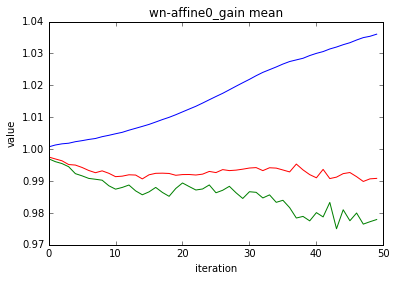

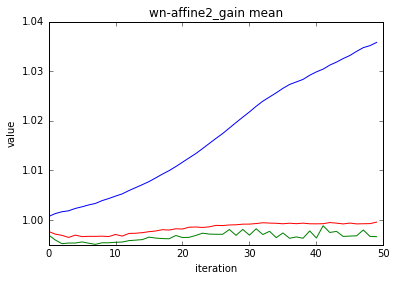

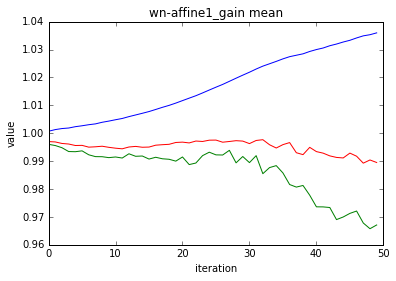

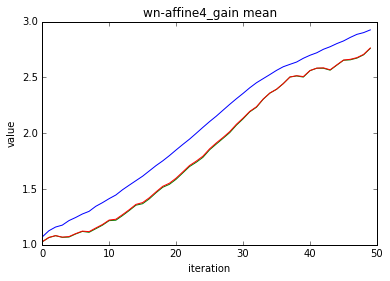

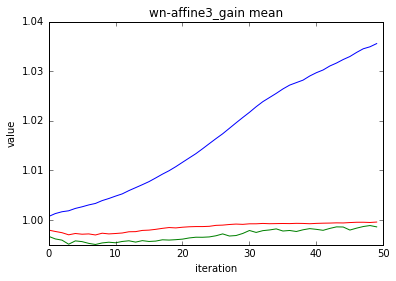

In [21]:
for key, value in gains.items():
    pl.figure()
    mean = [g.mean() for g in value] # negative gain?
    lower_tile = [np.percentile(g, tile) for g in value]
    upper_tile = [np.percentile(g, 1 - tile) for g in value]
    pl.plot(range(len(value)), mean)
    pl.plot(range(len(value)), lower_tile)
    pl.plot(range(len(value)), upper_tile)
    pl.title('%s mean' % key)
    pl.xlabel('iteration')
    pl.ylabel('value')

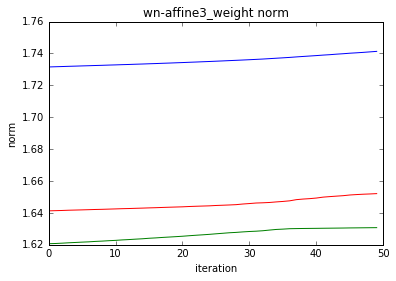

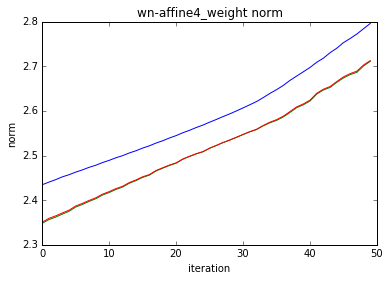

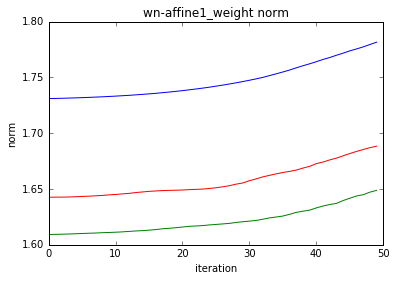

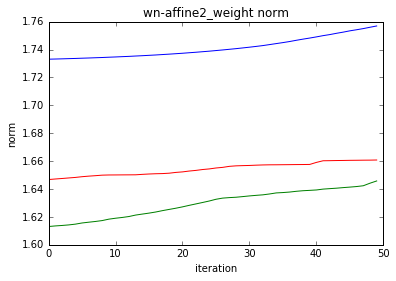

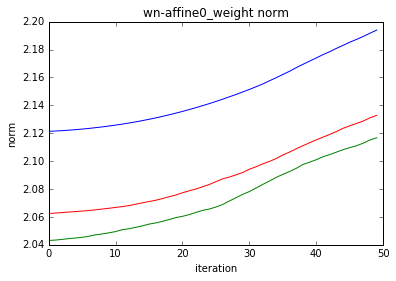

In [22]:
# verify norm
import numpy.linalg as la
for key, value in weights.items():
    norm = [la.norm(w, axis=0) for w in value]
    norm_mean = [w.mean() for w in norm]
    lower_tile = [np.percentile(w, tile) for w in norm]
    upper_tile = [np.percentile(w, 1 - tile) for w in norm]
    pl.figure()
    pl.plot(range(len(value)), norm_mean)
    pl.plot(range(len(value)), lower_tile)
    pl.plot(range(len(value)), upper_tile)
    pl.title('%s norm' % key)
    pl.xlabel('iteration')
    pl.ylabel('norm')

In [5]:
X = np.random.uniform(0, 1, (10000))
np.mean(X ** 2)

0.33859227259899544